# 6.1.6 [Time Series Challenge](https://courses.thinkful.com/data-201v1/project/6.1.6)

Using a time series data set https://fred.stlouisfed.org/:
* Plot the time series and any logical differences to get a stationary dataset
* Generate and interpret a PACF for the time series or its differences
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling the data
* Choose one specification and make the case for that as the best model for the dataet


Dataset from FRED U.S./ Euro Foreign Exchange Rate: https://fred.stlouisfed.org/series/DEXUSEU
* 5 years 2014-01-01 to 2019-01-01

In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
us_euro = pd.read_csv('us_euro.csv')

us_euro['ex_rate'] = pd.to_numeric(us_euro.DEXUSEU, errors='coerce')
us_euro.dropna(inplace=True)

# Convert date field to dates
us_euro.index = pd.to_datetime(us_euro.DATE)

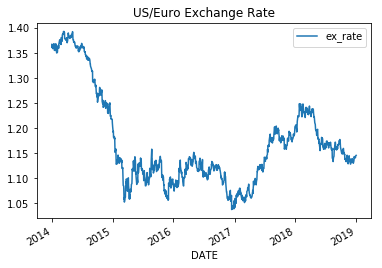

In [4]:
# Plot Time Series
us_euro.plot()
plt.title('US/Euro Exchange Rate')
plt.show()

Great so we have an exchage rate over time. This is definitely not a 'stationary' data set. Let's try plotting the differences to uncover the underlying trends.

In [5]:
# Start with the difference between current day and last
us_euro['diff_1'] = us_euro.ex_rate - us_euro.ex_rate.shift()
us_euro.head()

,DATE,DEXUSEU,ex_rate,diff_1
DATE,,,,
2014-01-02,2014-01-02,1.3670,1.3670,NaN
2014-01-03,2014-01-03,1.3606,1.3606,-0.0064
2014-01-06,2014-01-06,1.3636,1.3636,0.0030
2014-01-07,2014-01-07,1.3618,1.3618,-0.0018
2014-01-08,2014-01-08,1.3586,1.3586,-0.0032


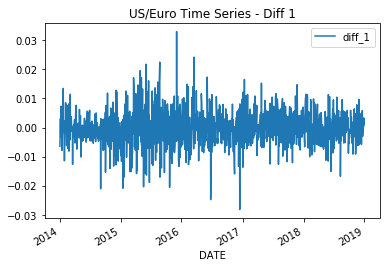

In [21]:
# Plot the level_diff
us_euro.plot(y='diff_1')
plt.title('US/Euro Time Series - Diff 1')
plt.show()

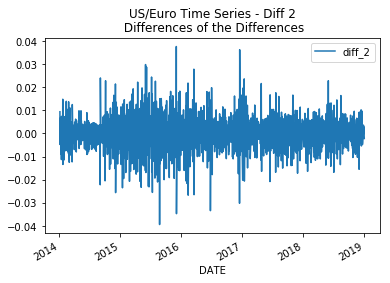

In [51]:
us_euro['diff_2'] = us_euro.diff_1 - us_euro.diff_1.shift()
# Plot the level_diff
us_euro.plot(y='diff_2')
plt.title('US/Euro Time Series - Diff 2\n Differences of the Differences')
plt.show()

In [48]:
us_euro.head()

,DATE,DEXUSEU,ex_rate,diff_1,diff_2
DATE,,,,,
2014-01-02,2014-01-02,1.3670,1.3670,NaN,NaN
2014-01-03,2014-01-03,1.3606,1.3606,-0.0064,NaN
2014-01-06,2014-01-06,1.3636,1.3636,0.0030,0.0094
2014-01-07,2014-01-07,1.3618,1.3618,-0.0018,-0.0048
2014-01-08,2014-01-08,1.3586,1.3586,-0.0032,-0.0014


I'm not sure what this means yet but the guided example says to look at the PACF for the initial and differenced time series.

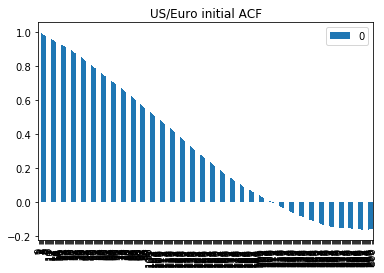

In [6]:
x_regacf = pd.DataFrame(acf(us_euro.ex_rate, nlags=300))

x_regacf.plot(kind='bar')
plt.title('US/Euro initial ACF')
plt.xlim
plt.show()

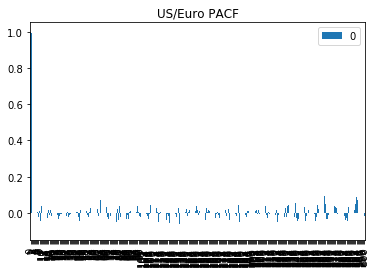

In [7]:
x_acf = pd.DataFrame(pacf(us_euro.ex_rate, nlags=300))

x_acf.plot(kind='bar')
plt.title('US/Euro PACF')
#plt.legend('difference')
plt.show()

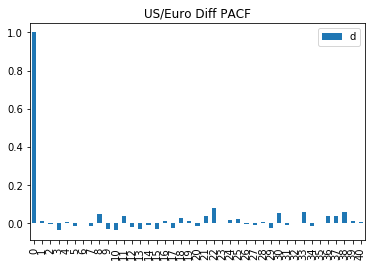

In [8]:
x_acf = pd.DataFrame(pacf(us_euro.diff_1[1:]))

x_acf.plot(kind='bar')
plt.title('US/Euro Diff PACF')
plt.legend('difference')
plt.show()

Initial time series has 1 strong autocorrecation, the differences don't seem to have a strong autocorrelcation.

When testing the parameters for ARIMA:
* order = (p,  d,  q)
* corre = (AR, I, MA)

|order|parameter|meaning|
|:---:|:---:|:---:|
|**p**| AR |past values|
|**d**| I  |level of differencing|
|**q**| MA |adjusting to past errors|

### Interpretting the ARIMIA/ARMA Model Summaries
**p-values**: approximate the likelihood that the coefficient has a significant effect on our outcome (formally this is a prob of more extreme results) - allows us to craft the 95% confidence interfal for the coefficient. if zero is within that interval than the coefficient is considered potentially unnecessary

**log-likelihood**: a log of the likelihood that the model would generate the data we see. - closer to zero the higher the probability we are to have predicted our outcome with our model

**residuals**: difference between our prediction and the observed quatity. These are pretty important in time series. Like in linear modeling we want our residuals to be random and normally distributed



Interpretting Our ARIMA(1,0,1)

1. the constant is approximately 1700. 
2. AR1 coeff = .9994: so each day is approx equal to the previous days value
3. MA is approx .08 so it will move against the previous error by about 8%
* show the model is moving steadily at the same level as the previous value but compensating slightly against any error


Then each day is approximately equal to the previous day's value. This is explained through the AR1 coefficient being approximately .9994. The moving average term is approximately .08, meaning that it will move against the previous error by about 8%. These two combine to show a is steadily at the same level as the previous value, but compensating back slightly against any error.

Can you interpret the output of one of the other models? What about ARIMA(1,1,1)? Which do you prefer? Then try some of your own coefficients below.

#### The model_010 below is using: 
1. **AR(0)** - No past values (no auto regressive)
2. **I(1)** - 1 level of differencing (average slope of the trend)
3. **MA(0)** - No past error (no moving average)

The results hace an AIC of -9205.32

This model is just an I so it only returns a constant. The p-value does not support statistical significance and the confidence interval for the constant crosses 0 so can likely be dropped. It's also such a small coef for the constant that this model really isn't doing much more than taking 1 order of difference from the input values. 

Model_010 is a no

In [17]:
model_010 = ARIMA(us_euro.ex_rate, order=(0,1,0))
model_fit_010 = model_010.fit()
print(model_fit_010.summary())
print('Residuals Description')
print(model_fit_010.resid.describe())

aic_010 = -9205.324

                             ARIMA Model Results                              
Dep. Variable:              D.ex_rate   No. Observations:                 1249
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4604.662
Method:                           css   S.D. of innovations              0.006
Date:                Sun, 20 Jan 2019   AIC                          -9205.324
Time:                        13:40:51   BIC                          -9195.063
Sample:                             1   HQIC                         -9201.466
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -1.033      0.302      -0.001       0.000
Residuals Description
count    1.249000e+03
mean     1.401211e-10
std      6.065024e-03
min     -2.792274e-02
25%     -3.422738e-03

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a n

#### 1. The model_100 below is using: 
1. **AR(1)** - autoregressive with an order of 1 
2. **I(0)** - No abstractions on differencing
3. **MA(0)** - No past error (no moving average)


Model_100 is just a autoregressive to the order of 1. 
* p-values: The p-values indicate statistic signficance for the constant and the coefficient for the autoregressive variable. 
* AIC: -9204.76 which is pretty close to what we had for model_010.
* coefficients: The p-values indicate statistic signficance for the constant and the coefficient for the autoregressive variable.
Next lets see if adding a variable to incorporate yesterday's noise increases the performance.

In [18]:
model_100 = ARIMA(us_euro.ex_rate, order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

aic_100 = -9204.759

                              ARMA Model Results                              
Dep. Variable:                ex_rate   No. Observations:                 1250
Model:                     ARMA(1, 0)   Log Likelihood                4605.379
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 20 Jan 2019   AIC                          -9204.759
Time:                        13:41:08   BIC                          -9189.366
Sample:                             0   HQIC                         -9198.972
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2141      0.079     15.439      0.000       1.060       1.368
ar.L1.ex_rate     0.9984      0.001    721.010      0.000       0.996       1.001
                                    Root

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind

#### 2. The model_101 below is using:
1. **AR(1)** - autoregressive with an order of 1
2. **I(0)** - No abstractions on differencing
3. **MA(1)** -  past error with an order of 1

Model_101 is just an ARMA  
* p-values: for Ar & constant are fine but looks like we could drop the MA(1)
* AIC: -9202.88

Model_100 is currently winning. Curious what happens with just a moving average in the model. 

In [19]:
model_101 = ARIMA(us_euro.ex_rate, order=(1,0,1))
model_101_fit = model_101.fit()
print(model_101_fit.summary())
print('Residuals Description')
print(model_101_fit.resid.describe())

aic_101 = -9202.884

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                ex_rate   No. Observations:                 1250
Model:                     ARMA(1, 1)   Log Likelihood                4605.442
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 20 Jan 2019   AIC                          -9202.884
Time:                        13:41:23   BIC                          -9182.361
Sample:                             0   HQIC                         -9195.169
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2137      0.078     15.536      0.000       1.061       1.367
ar.L1.ex_rate     0.9984      0.001    707.915      0.000       0.996       1.001
ma.L1.ex_rate     0.0101      0.028     

#### 3. The model_101 below is using:
1. **AR(0)** - No autoregressive incorporated
2. **I(0)** - No abstractions on differencing
3. **MA(1)** -  past error with an order of 1

Model_101 is just an MA  
* p-values: for MA & constant are both 0 so we are good to go. Looks like the error of yesterday is a good indictor of the error of today?
* AIC: -3995.423 Many of the AIC's have been negative and i'm not sure what that means. The reading said that the lowest AIC was most likely the ideal model but I could see the lowest absolute value AIC to be more important than just the lowest AIC

I have to check the AIC rules but its looking like we either want AR(1) or MA(1) but having both is detrimental to the model. 

In [20]:
model_001 = ARIMA(us_euro.ex_rate, order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('Residuals Description')
print(model_001_fit.resid.describe())

aic_001 = -3995.423

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                ex_rate   No. Observations:                 1250
Model:                     ARMA(0, 1)   Log Likelihood                2000.711
Method:                       css-mle   S.D. of innovations              0.049
Date:                Sun, 20 Jan 2019   AIC                          -3995.423
Time:                        13:41:41   BIC                          -3980.030
Sample:                             0   HQIC                         -3989.636
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1716      0.003    436.251      0.000       1.166       1.177
ma.L1.ex_rate     0.9473      0.006    151.531      0.000       0.935       0.960
                                    Root

#### 4. The model_111 below is using:
1. **AR(1)** - autoregressive order of 1
2. **I(1)** - 1 abstraction of the differences in lagged days
3. **MA(1)** -  past error with an order of 1

Model_111 is the first that is legitimately an ARIMA with all 3 specifications included  
* p-values: for the constant the pvalue is not statistically significant which makes me think there is an issue with taking 1 abstraction level of the differences. However, the p-values for AR and MA are in the safe range which did not occur without the I included. 
* AIC: -9203.949 - still need to look up the details on AICs

I have to check the AIC rules but its looking like we either want AR(1) or MA(1) but having both is detrimental to the model. 

In [21]:
model_111 = ARIMA(us_euro.ex_rate, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

aic_111 = -9203.949

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.ex_rate   No. Observations:                 1249
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4605.974
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 20 Jan 2019   AIC                          -9203.949
Time:                        13:42:00   BIC                          -9183.428
Sample:                             1   HQIC                         -9196.234
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0002      0.000     -1.034      0.301      -0.001       0.000
ar.L1.D.ex_rate    -0.9992      0.002   -405.129      0.000      -1.004      -0.994
ma.L1.D.ex_rate     0.9973      

In [22]:
model_121 = ARIMA(us_euro.ex_rate, order=(1,2,1))
model_121_fit = model_121.fit()
print(model_121_fit.summary())
print('Residuals Description')
print(model_121_fit.resid.describe())

aic_121 = -9181.369

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D2.ex_rate   No. Observations:                 1248
Model:                 ARIMA(1, 2, 1)   Log Likelihood                4594.685
Method:                       css-mle   S.D. of innovations              0.006
Date:                Sun, 20 Jan 2019   AIC                          -9181.369
Time:                        13:42:24   BIC                          -9160.852
Sample:                             2   HQIC                         -9173.656
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.019e-08   2.86e-06      0.004      0.997   -5.59e-06    5.61e-06
ar.L1.D2.ex_rate    -0.0135      0.029     -0.469      0.639      -0.070       0.043
ma.L1.D2.ex_rate    -0.9841 

### Lets look closer at Residuals of one model
In time series we want residuals to be random and normally distributed

Text(0.5,1,'Histogram of Residuals')

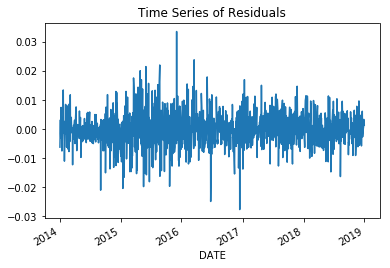

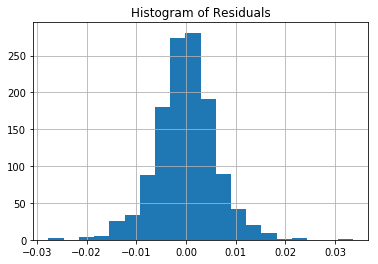

In [45]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The residuals still have a 

The histogram looks pretty standard normal - I don't know what this means though.

### Comparing Models with AIC
1. **AIC**: measure of the degree of info contained in the model
2. Model with the lowest AIC is likely the best model to choose
3. How much better is calculated using the ratio of AIC's

When comparing to our minimal AIC other models are compared in the context of information loss.  
The probability that another model minimizes info loss is calculated:
$$ exp((AIC_{min} - AIC_{x})/2) $$

In [23]:
def compare_aic(low_aic,high_aic):
    return math.exp((low_aic-high_aic)/2)

In [29]:
compare_aic(aic_100, aic_001)

0.0

In [30]:
compare_aic(aic_100, aic_101)

0.391605626676799

In [34]:
compare_aic(aic_100, aic_111)

0.6669768108586442

In [37]:
compare_aic(aic_001, aic_111)

OverflowError: math range error

I keep getting errors when I try to compare the MA(1) model to other models. It does look like the MA(1) is the most efficient when comparing AIC's with othe models which is a logical solution to me more a makret like echange rates that changes very slowly over time.